In [1]:
import os
import warnings

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

from soma.generators.nmist import NmistGenerator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_sample_size
from soma.util.plot import plot_errors, plot_time

In [2]:
plot_dir = os.path.expanduser('~/Plots/power_sample_size')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [4]:
samples = np.array([100, 250, 500, 1000, 2500, 5000])
repeat = 200

# NMIST

In [5]:
nmist2 = NmistGenerator(2)
nmist3 = NmistGenerator(3)

In [6]:
nmist_results = stat_errors_vs_sample_size(nmist2, nmist3, tests, samples, repeat=repeat)

  0%|          | 0/24 [00:00<?, ?it/s]

In [7]:
nmist_results.to_csv(os.path.join(plot_dir, 'nmist_results_samples.csv'))

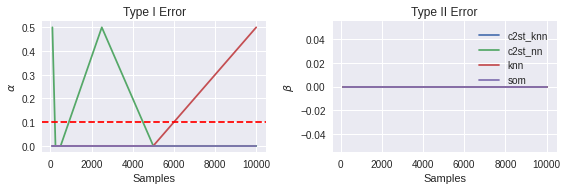

In [8]:
nmist_fig = plot_errors(nmist_results)
nmist_fig.savefig(os.path.join(plot_dir, 'nmist_power_samples.eps'))

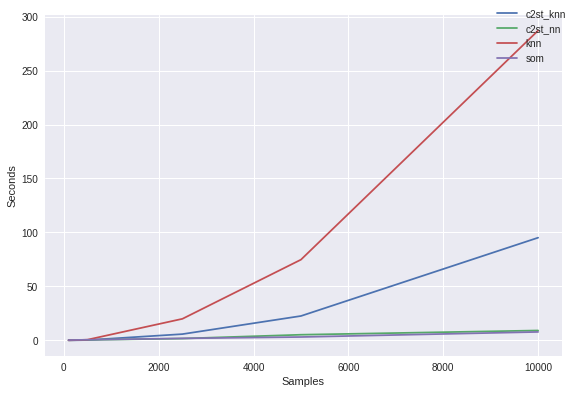

In [10]:
nmist_time = plot_time(nmist_results)
nmist_time.savefig(os.path.join(plot_dir, 'nmist_time_samples.eps'))